## Exploratory Data Analysis on Cab Rides
Dataset: The dataset contains Start Date, End Date, Start Location, End Location, Miles Driven and Purpose of drive (Business, Personal, Meals, Errands, Meetings, Customer Support etc.) 

## Import Required Libraries

In [70]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from builtins import list
import matplotlib
matplotlib.style.use('ggplot')

import datetime

%matplotlib inline


## Load the Data

In [78]:
Cab_df = pd.read_csv("C:\\Users\\Karan45\\Desktop\\attachments (4)\\python\\My Uber Drives - 2016.csv", parse_dates=[1,0]) 

In [79]:
# check the datatype of variables
Cab_df.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [80]:
# check the number of rows and columns
Cab_df.shape

(1155, 7)

In [82]:
# Use head() and tail() functions of the Pandas library, to check out the first and last lines of your DataFrame, respectively.
# look at some sample data
Cab_df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [83]:
Cab_df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [84]:
# check that all data is fixed and ready to work on it
Cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
START_DATE*    1155 non-null datetime64[ns]
END_DATE*      1155 non-null datetime64[ns]
CATEGORY*      1155 non-null object
START*         1155 non-null object
STOP*          1155 non-null object
MILES*         1155 non-null float64
PURPOSE*       653 non-null object
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.2+ KB


In [85]:
# Basic description of data
# We can use the describe() function to get summary statistics
Cab_df.describe()

,MILES*
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


From the above result, we conclude that the longest traveling distance is 310 miles

## Missing Values 
Most libraries will give you an error if you try to build a model using data with missing values
Python libraries represent missing numbers as nan which is short for "not a number". You can detect which cells have missing values, and then count how many there are in each column with the command

In [86]:
# check for missing values
missing = Cab_df.isnull().sum()
missing

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

For a PURPOSE* column there is lots of NaN entries.We can replace missing values by mode.

In [87]:
# Calculate mode 
Cab_df.mode()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-06-28 23:34:00,2016-06-28 23:59:00,Business,Cary,Cary,9.9,Meeting


In [88]:
Cab_df.mode(axis=0, numeric_only=False)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-06-28 23:34:00,2016-06-28 23:59:00,Business,Cary,Cary,9.9,Meeting


In [89]:
# Fill missing value by mode
Cab_df['PURPOSE*'].fillna("Meeting", inplace = True)   

In [90]:
Cab_df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meeting
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [91]:
grouped = Cab_df.groupby('CATEGORY*').sum().reset_index()
grouped.sort_values('CATEGORY*', ascending=False)

,CATEGORY*,MILES*
1,Personal,717.7
0,Business,11487.0


In [92]:
# again check for missing values
# check for missing values
# check for missing values
missing = Cab_df.isnull().sum()
missing

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

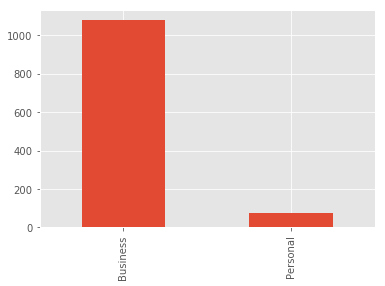

In [93]:
# plot number of trip at each category
x = Cab_df['CATEGORY*'].value_counts().plot(kind='bar')

As we notice that travaling for business is far more than for personal reasons

## Number of trips per month

In [67]:
#extract month from start date
count = 0
month=[]
while count < len(Cab_df):
    month.append(Cab_df['START_DATE*'][count].month)
    count = count+1
Cab_df['Month'] = month

In [68]:
# calculate duration of each trip in minutes
minutes=[]
Cab_df['Duration_Minutes'] = Cab_df['END_DATE*'] - Cab_df['START_DATE*']
Cab_df['Duration_Minutes']
for x in Cab_df['Duration_Minutes']:
    minutes.append(x.seconds / 60)

Cab_df['Duration_Minutes'] = minutes

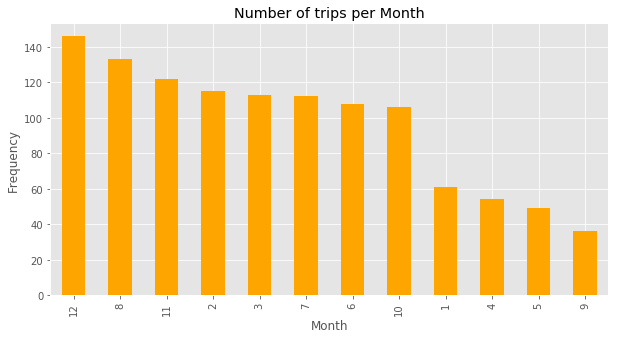

In [69]:
# plot number of trips at each month
x = Cab_df['Month'].value_counts()
x.plot(kind='bar',figsize=(10,5),color='orange')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Number of trips per Month')

It shows the number of uber trips is increasing in October, June, July, March, February, November, August, December.   

Text(0.5,1,'Number of trips per hour')

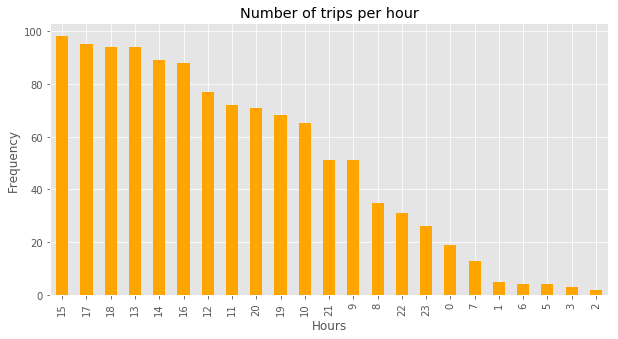

In [19]:
# I need to see how many trip made at each clock and as you see the clock which has the higest number of trips is 3:00PM
hours = Cab_df['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar',color='orange',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips per hour')

## Trips made by each purpose

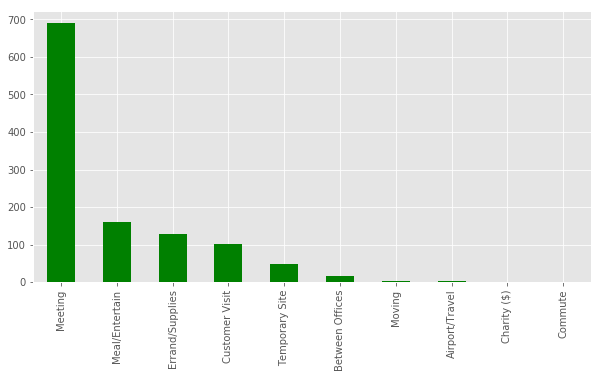

In [20]:
# see how many trips made by each purpose
purpose_time = Cab_df['PURPOSE*'].value_counts()
purpose_time.plot(kind='bar',figsize=(10,5),color='green') 

Here we can see that most of the uber trips are made for Meeting purpose 

## Trip Speed for each driver

In [21]:
# calculate trip speed for each driver
Cab_df['Duration_hours'] = Cab_df['Duration_Minutes'] / 60
Cab_df['Speed_KM'] = Cab_df['MILES*'] / Cab_df['Duration_hours']
Cab_df['Speed_KM']

0       51.000000
1       25.000000
2       22.153846
3       20.142857
4       57.044776
5       64.500000
6       85.200000
7        8.000000
8       24.900000
9       36.666667
10      15.069767
11      12.857143
12      18.600000
13      14.769231
14      13.714286
15       7.285714
16       8.769231
17       7.125000
18      15.000000
19       7.714286
20       9.600000
21      10.000000
22      15.620690
23      51.692308
24      25.285714
25      36.500000
26      39.000000
27      24.000000
28      31.200000
29      34.666667
          ...    
1125    19.312500
1126    20.800000
1127    15.000000
1128    14.571429
1129    18.857143
1130     9.913043
1131     9.000000
1132    13.411765
1133    30.260870
1134    22.312500
1135    10.500000
1136     9.428571
1137    16.400000
1138    22.875000
1139     7.090909
1140    12.000000
1141    12.300000
1142    14.400000
1143     7.836735
1144    23.454545
1145     9.333333
1146     6.960000
1147    12.545455
1148    12.000000
1149    12